In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import math
from scipy.stats import chisquare


In [31]:
# Load the dataset
df = pd.read_csv('stars_dataset.csv')
df.head()




,No,Star Name,Equatorial Coordinates,Galactic Longitude,Galactic Latitude,Spectral Type,Visual Magnitude,Absolute Magnitude,Parallax,Error,Distance (ly)
0,1,Alpha Canis Majoris Sirius,06 45 -16.7,227.2,-8.9,A1V,-1.46,1.43,379.21,1.58,9
1,2,Alpha Carinae Canopus,06 24 -52.7,261.2,-25.3,F0Ib,-0.73,-5.64,10.43,0.53,310
2,3,Alpha Centauri Rigil Kentaurus,14 40 -60.8,315.8,-0.7,G2V+K1V,-0.29,4.06,742.12,1.40,4
3,7,Beta Orionis Rigel,05 15 -8.2,209.3,-25.1,B8Ia,0.15v,-6.72v,4.22,0.81,770
4,9,Alpha Eridani Achernar,01 38 -57.2,290.7,-58.8,B3V,0.45,-2.77,22.68,0.57,144


In [32]:
# Extract first digit
def first_digit(x):
    x = abs(x)
    while x >= 10:
        x //= 10
    while x < 1 and x != 0:
        x *= 10
    return int(x) if x != 0 else None

# Get actual and expected Benford frequencies
def benford_distribution():
    return {d: math.log10(1 + 1/d) for d in range(1, 10)}

def get_first_digit_distribution(series):
    digits = series.dropna().astype(float).map(first_digit)
    digits = digits[digits.between(1, 9)]
    total = len(digits)
    counts = Counter(digits)
    actual_freq = {str(d): counts[d] / total for d in range(1, 10)}
    observed = np.array([counts[d] for d in range(1, 10)])
    expected_freq = np.array([benford_distribution()[d] * total for d in range(1, 10)])
    return actual_freq, observed, expected_freq, total







--- Analyzing column: No ---


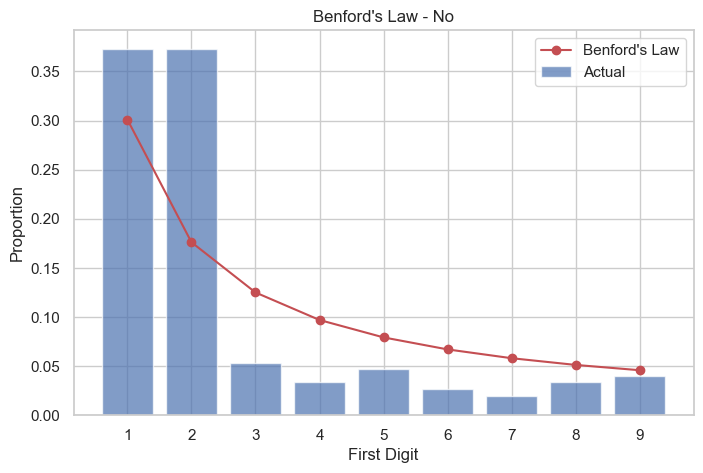

Chi-squared: 58.57, p-value: 0.0000

--- Analyzing column: Galactic Longitude ---


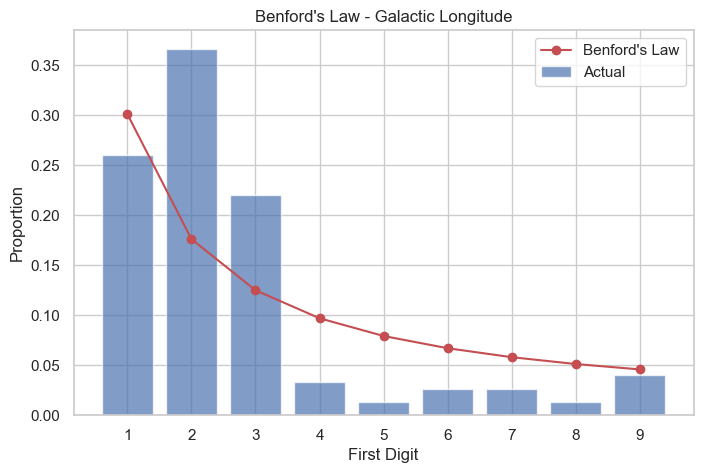

Chi-squared: 67.57, p-value: 0.0000

--- Analyzing column: Galactic Latitude ---


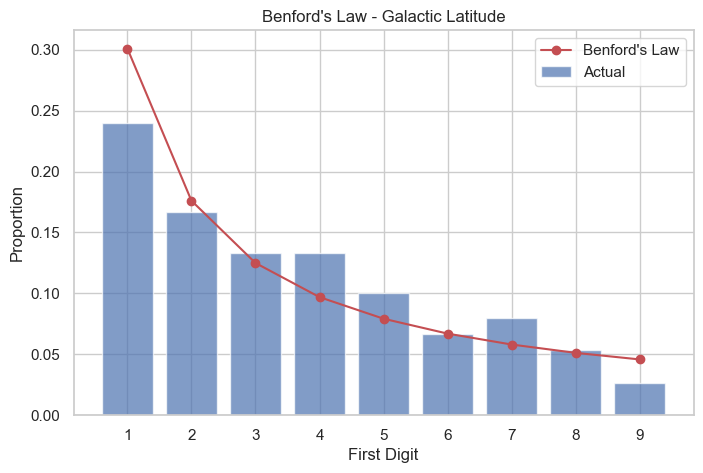

Chi-squared: 7.35, p-value: 0.4991

--- Analyzing column: Parallax ---


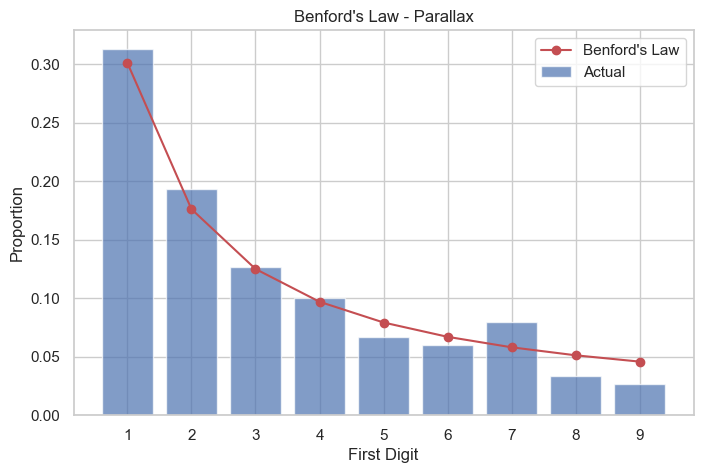

Chi-squared: 4.13, p-value: 0.8452

--- Analyzing column: Error ---


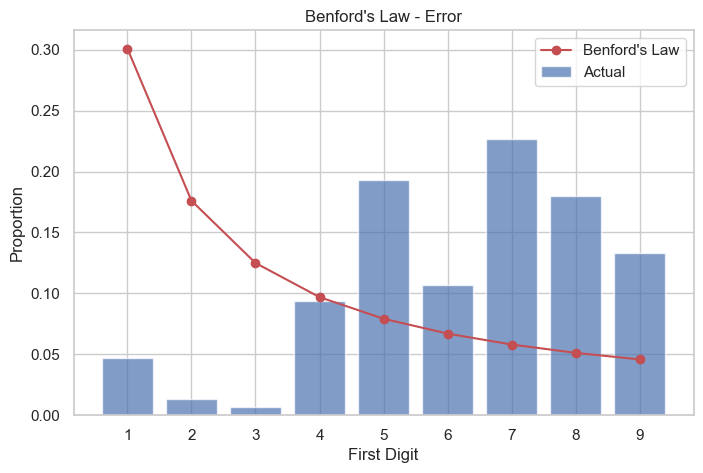

Chi-squared: 247.25, p-value: 0.0000

--- Analyzing column: Distance (ly) ---


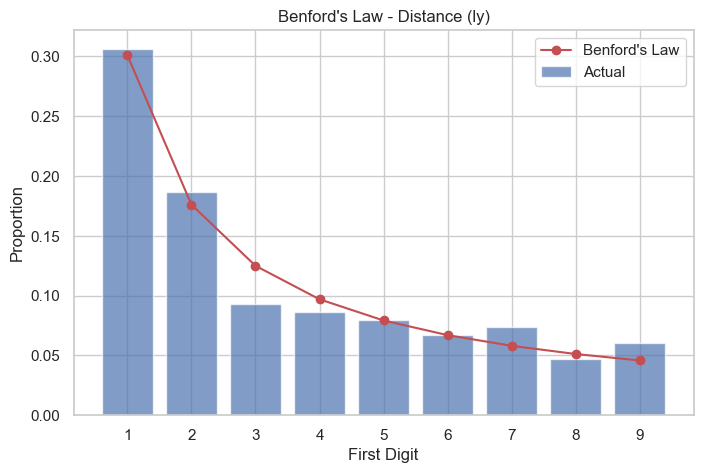

Chi-squared: 2.81, p-value: 0.9459


In [33]:
# Select numerical columns only
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Loop through and analyze each column
for col in numerical_cols:
    print(f"\n--- Analyzing column: {col} ---")
    actual_freq, observed, expected, total = get_first_digit_distribution(df[col])
    
    # Plot
    digits = list(map(str, range(1, 10)))
    plt.figure(figsize=(8, 5))
    plt.bar(digits, [actual_freq.get(d, 0) for d in digits], alpha=0.7, label='Actual')
    plt.plot(digits, [benford_distribution()[int(d)] for d in digits], 'ro-', label="Benford's Law")
    plt.title(f"Benford's Law - {col}")
    plt.xlabel('First Digit')
    plt.ylabel('Proportion')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Chi-squared test
    chi_stat, p_val = chisquare(f_obs=observed, f_exp=expected)
    print(f"Chi-squared: {chi_stat:.2f}, p-value: {p_val:.4f}")





In [34]:
from scipy.stats import chisquare

# Prepare observed and expected frequencies
observed = np.array([digit_counts[int(d)] for d in digits])
expected = np.array([benford_freq[d] * total for d in digits])

# Chi-squared test
chi_stat, p_value = chisquare(f_obs=observed, f_exp=expected)
print(f"Chi-squared statistic: {chi_stat:.2f}, p-value: {p_value:.4f}")


Chi-squared statistic: 2.81, p-value: 0.9459
